### Instalação de Pacotes / Importação de Bibliotecas

In [1]:
%%capture
!pip install basedosdados
!pip install pyarrow

In [2]:
import basedosdados as bd
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import folium
from folium.plugins import MarkerCluster


### Leitura dos Bancos de dados

#### Dicionário Banco de Dados | Administração Serviços Públicos - Chamado 1746
#### Nome	Descrição

- **id_chamado**	Identificador único do chamado no banco de dados.

- **data_inicio**	Data de abertura do chamado. Ocorre quando o operador registra o chamado.

- **data_fim**	Data de fechamento do chamado. O chamado é fechado quando o pedido é atendido ou quando se percebe que o pedido não pode ser atendido.

- **id_bairro**	Identificador único, no banco de dados, do bairro onde ocorreu o fato que gerou o chamado.

- **id_territorialidade**	Identificador único, no banco de dados, da territorialidade onde ocorreu o fato que gerou o chamado. Territorialidade é uma região da cidade do Rio de Janeiro que tem com responsável um órgão especifico. Exemplo: CDURP, que é responsável pela região do porto do Rio de Janeiro.

- **id_logradouro**	Identificador único, no banco de dados, do logradouro onde ocorreu o fato que gerou o chamado.

- **numero_logradouro**	Número da porta onde ocorreu o fato que gerou o chamado.

- **id_unidade_organizacional**	Identificador único, no banco de dados, do órgão que executa o chamado. Por exemplo: identificador da COMLURB quando o chamado é relativo a limpeza urbana.

- **nome_unidade_organizacional**	Nome do órgão que executa a demanda. Por exemplo: COMLURB quando a demanda é relativa a limpeza urbana.

- **id_unidade_organizacional_mae**	ID da unidade organizacional mãe do orgão que executa a demanda. Por exemplo: "CVA - Coordenação de Vigilância de Alimentos" é quem executa a demanda e obede a unidade organizacional mãe "IVISA-RIO - Instituto Municipal de Vigilância Sanitária, de Zoonoses e de Inspeção Agropecuária". A coluna se refere ao ID deste último.

- **unidade_organizadional_ouvidoria**	Booleano indicando se o chamado do cidadão foi feita Ouvidoria ou não. 1 caso sim, 0 caso não,

- **categoria**	Categoria do chamado. Exemplo: Serviço, informação, sugestão, elogio, reclamação, crítica.

- **id_tipo**	Identificador único, no banco de dados, do tipo do chamado. Ex: Iluminação pública.

- **tipo**	Nome do tipo do chamado. Ex: Iluminação pública.

- **id_subtipo**	Identificador único, no banco de dados, do subtipo do chamado. Ex: Reparo de lâmpada apagada.

- **subtipo**	Nome do subtipo do chamado. Ex: Reparo de lâmpada apagada.

- **status**	Status do chamado. Ex. Fechado com solução, aberto em andamento, pendente etc.

- **longitude**	Longitude do lugar do evento que motivou o chamado.

- **latitude**	Latitude do lugar do evento que motivou o chamado.

- **data_alvo_finalizacao**	Data prevista para o atendimento do chamado. Caso - prazo_tipo seja D fica em branco até o diagnóstico ser feito.

- **data_alvo_diagnostico**	Data prevista para fazer o diagnóstico do serviço. Caso - prazo_tipo seja F esta data fica em branco.

- **data_real_diagnostico**	Data em que foi feito o diagnóstico do serviço. Caso prazo_tipo seja F esta data fica em branco.

- **tempo_prazo**	Prazo para o serviço ser feito. Em dias ou horas após a abertura do chamado. Caso haja diagnóstico o prazo conta após se fazer o diagnóstico.

- **prazo_unidade**	Unidade de tempo utilizada no prazo. Dias ou horas. D ou H.

- **prazo_tipo**	Diagnóstico ou finalização. D ou F. Indica se a chamada precisa de diagnóstico ou não. Alguns serviços precisam de avaliação para serem feitos, neste caso é feito o diagnóstico. Por exemplo, pode de árvore. Há a necessidade de um engenheiro ambiental verificar a necessidade da poda ou não.

- **dentro_prazo**	Indica se a data alvo de finalização do chamado ainda está dentro do prazo estipulado.

- **situacao**	Identifica se o chamado foi encerrado

- **tipo_situacao**	Indica o status atual do chamado entre as categorias Atendido, Atendido parcialmente, Não atendido, Não constatado e Andamento

- **justificativa_status**	Justificativa que os órgãos usam ao definir o status. Exemplo: SEM POSSIBILIDADE DE ATENDIMENTO - justificativa: Fora de área de atuação do municipio

- **reclamacoes**	Quantidade de reclamações.

In [3]:
# Consulta SQL selecionando dados a partir de 2022
query = """
    SELECT *
    FROM `datario.administracao_servicos_publicos.chamado_1746`
    WHERE EXTRACT(YEAR FROM data_inicio) >= 2022 """

# Lendo dados filtrados
dados_chamado1746 = bd.read_sql(query, billing_project_id="projeto-rio2024")
dados_chamado1746

Downloading: 100%|██████████| 1750528/1750528 [09:11<00:00, 3174.04rows/s]


,id_chamado,data_inicio,data_fim,id_bairro,id_territorialidade,id_logradouro,numero_logradouro,id_unidade_organizacional,nome_unidade_organizacional,id_unidade_organizacional_mae,...,tempo_prazo,prazo_unidade,prazo_tipo,dentro_prazo,situacao,tipo_situacao,justificativa_status,reclamacoes,data_particao,geometry
0,19881787,2024-02-09 11:25:38,2024-02-20 11:41:36,7,1,66415,780,41,DEFESA CIVIL - Subsecretaria de Proteção e Def...,DEFESA CIVIL - Subsecretaria de Proteção e Def...,...,<NA>,D,F,No prazo,Encerrado,Não atendido,None,0,2024-02-01,POINT(-43.2014953 -22.9317826)
1,19917121,2024-02-19 14:59:42,2024-02-19 15:34:51,150,5,39453,2005,70,GM-RIO - Guarda Municipal do Rio de Janeiro,GM-RIO - Guarda Municipal do Rio de Janeiro,...,<NA>,H,F,No prazo,Encerrado,Não atendido,None,0,2024-02-01,None
2,19845848,2024-02-03 20:00:33,2024-02-03 20:06:12,89,3,28209,167,70,GM-RIO - Guarda Municipal do Rio de Janeiro,GM-RIO - Guarda Municipal do Rio de Janeiro,...,<NA>,H,F,No prazo,Encerrado,Não atendido,None,0,2024-02-01,POINT(-43.3665443 -22.8747662)
3,19833134,2024-02-01 12:11:08,2024-02-01 15:54:09,76,3,141689,899,117,Subgerência de Patrulhamento Ambiental - Base I,SMAC - Secretaria Municipal de Meio Ambiente d...,...,<NA>,H,F,No prazo,Encerrado,Não atendido,None,0,2024-02-01,None
4,19911727,2024-02-18 16:31:02,2024-02-18 16:55:29,151,5,7229,25,922,Central de Ambulâncias,SMS - Secretaria Municipal de Saúde,...,<NA>,H,F,No prazo,Encerrado,Não atendido,None,0,2024-02-01,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750523,19101491,2023-08-27 19:21:56,NaT,42,3,83261,140,1760,CDR - Coordenadoria de Diversidade Religiosa,CASA CIVIL - Secretaria Municipal da Casa Civil,...,<NA>,D,F,Fora do prazo,Não Encerrado,Andamento,None,0,2023-08-01,None
1750524,19036994,2023-08-10 12:55:02,NaT,66,3,42499,41,173,08aGC,SECONSERVA,...,<NA>,D,F,Fora do prazo,Não Encerrado,Andamento,None,0,2023-08-01,POINT(-43.2988837 -22.9048641)
1750525,19099548,2023-08-26 11:49:14,NaT,122,4,37127,2228,181,16aGC,SECONSERVA,...,<NA>,D,F,Fora do prazo,Não Encerrado,Andamento,None,0,2023-08-01,POINT(-43.392498 -22.9283752)
1750526,19079670,2023-08-22 08:52:12,NaT,122,4,37127,2135,181,16aGC,SECONSERVA,...,<NA>,D,F,Fora do prazo,Não Encerrado,Andamento,None,0,2023-08-01,POINT(-43.3918427 -22.9279328)


#### Dicionário Banco de Dados | Dados Mestres Bairros
#### Nome	Descrição

- **id_bairro**	Código do bairro dado pela prefeitura do Rio de Janeiro.

- **nome** Nome do bairro

- **id_area_planejamento** Código da área de planejamento onde está localizado a região de planejamento do bairro. Ver atributo nome_regiao_planejamento.

- **id_regiao_planejamento** Código da região de planejamento onde está localizado a região administrativa do bairro. Ver atributo REGIAO_ADM.

- **nome_regiao_planejamento** Nome da região de planejamento. Deve respeitar o atributo id_regiao_planejamento.

- **id_regiao_administrativa** Código da região administrativa onde está locallizado o bairro.

- **nome_regiao_administrativa** Nome da região administrativa onde está localizado o bairro. Este atributo deve respeitar o atributo id_regiao_administrativa.

- **subprefeitura**	Nome da subprefeitura a que pertence o bairro.

- **area**	Área (m²) do bairro. Tem o mesmo valor do atributo SHAPE.STArea().

- **perimetro**	Perímetro (m) do bairro.

- **geometry_wkt**

- **geometry** Geometria do bairro no banco do ArcGIS.

In [6]:
%%capture
#  Dados sobre os bairros da cidade do Rio de Janeiro - RJ

dados_bairro = bd.read_sql ( "SELECT * FROM `datario.dados_mestres.bairro`" , billing_project_id = "projeto-rio2024" )
dados_bairro

In [7]:
%%capture
# Unir os dataframes usando a coluna chave id_bairro

dados = pd.merge(dados_chamado1746, dados_bairro, on='id_bairro', how='left')
dados

### Respondendo Perguntas teste

#### 1- Quantos chamados foram abertos no dia 01/04/2023?


In [8]:
# Filtrando os dados para a data de início igual a '01/04/2023'
dados_filtrados = dados[dados['data_inicio'].dt.strftime('%Y-%m-%d') == '2023-04-01']

# Contando os valores únicos na coluna id_chamado
total_chamados_unicos = dados_filtrados['id_chamado'].nunique()
print("Total de chamados únicos abertos em 01/04/2023:", total_chamados_unicos)


Total de chamados únicos abertos em 01/04/2023: 73


RESPOSTA: Foram 73 chamados abertos

#### 2- Qual o tipo de chamado que teve mais reclamações no dia 01/04/2023?

In [ ]:
# Tabela 1 - Tipo de chamados com mais reclamções

dados_tabela1 = dados_filtrados['tipo'].value_counts().reset_index()
dados_tabela1.columns = ['Tipo de Chamado', 'Total de Reclamações']

# Criando tabela
fig = go.Figure(data=[go.Table(
    header=dict(values=['Tipo de Chamado', 'Total de Reclamações'],
                fill_color='grey',
                align='center',
                font=dict(color='white', size=14, family='Arial, sans-serif')),
    cells=dict(values=[dados_tabela1['Tipo de Chamado'], dados_tabela1['Total de Reclamações']],
               fill_color='white',
               align='center',
               font=dict(color='black', size=12, family='Arial, sans-serif')))
])

# Título, fonte
fig.update_layout(
    title=dict(text="Tipos de Chamado com Mais Reclamações em 01/04/2023", x=0.5, font=dict(size=16)),
    annotations=[dict(text="Fonte: DataRio | Portal de Dados Abertos da Prefeitura da Cidade do Rio de Janeiro", showarrow=False, x=0.5, y=-0.15, xref='paper', yref='paper', font=dict(size=12))]
)

fig.show()


RESPOSTA: Poluição Sonora foi o chamado com mais reclamações com 24 no total.

#### 3- Quais os nomes dos 3 bairros que mais tiveram chamados abertos nesse dia?


In [9]:
# Tabela 2 - Quantidade de chamados abertos por bairro

# Contando o número de chamados únicos por bairro
chamados_por_bairro = dados_filtrados.groupby('nome')['id_chamado'].nunique()

# Ordenando os bairros
bairros_mais_chamados = chamados_por_bairro.sort_values(ascending=False)

# Selecionando os 3 bairros com maior número de chamados abertos
top_3_bairros = bairros_mais_chamados.head(3)

# Calculando a soma total de chamados
total_chamados = bairros_mais_chamados.sum()

# Criando DataFrame com os dados
dados_tabela2 = bairros_mais_chamados.reset_index(name='Total de Chamados')

# Adicionando a linha com a soma total de chamados
dados_tabela2.loc[len(dados_tabela2)] = ['Total', total_chamados]

# Criar lista de cores para destacar as linhas
cores_destaque = ['lightgreen' if bairro in top_3_bairros.index else 'white' for bairro in dados_tabela2['nome']]

# Criando tabela
fig = go.Figure(data=[go.Table(
    header=dict(values=['Bairro', 'Total de Chamados'],
                fill_color='grey',
                align='center',
                font=dict(color='white', size=14, family='Arial, sans-serif')),
    cells=dict(values=[dados_tabela2['nome'], dados_tabela2['Total de Chamados']],
               fill_color=[cores_destaque, cores_destaque],
               align='center',
               font=dict(color='black', size=12, family='Arial, sans-serif')))
])

# Título, fonte
fig.update_layout(
    title=dict(text="Quantidade de Chamados Abertos por Bairros", x=0.5, font=dict(size=16)),
    annotations=[dict(text="Fonte: DataRio | Portal de Dados Abertos da Prefeitura da Cidade do Rio de Janeiro", showarrow=False, x=0.5, y=-0.15, xref='paper', yref='paper', font=dict(size=12))]
)

fig.show()


RESPOSTA: Como podemos observar os 3 bairros que mais tiveram chamados foram Engenho de Dentro com 8, Campo Grande e Leblon empatados com 6 seguidos de Barra da Tijuca e Engenho da Rainha empatados com 5.

#### 4- Qual o nome da subprefeitura com mais chamados abertos nesse dia?

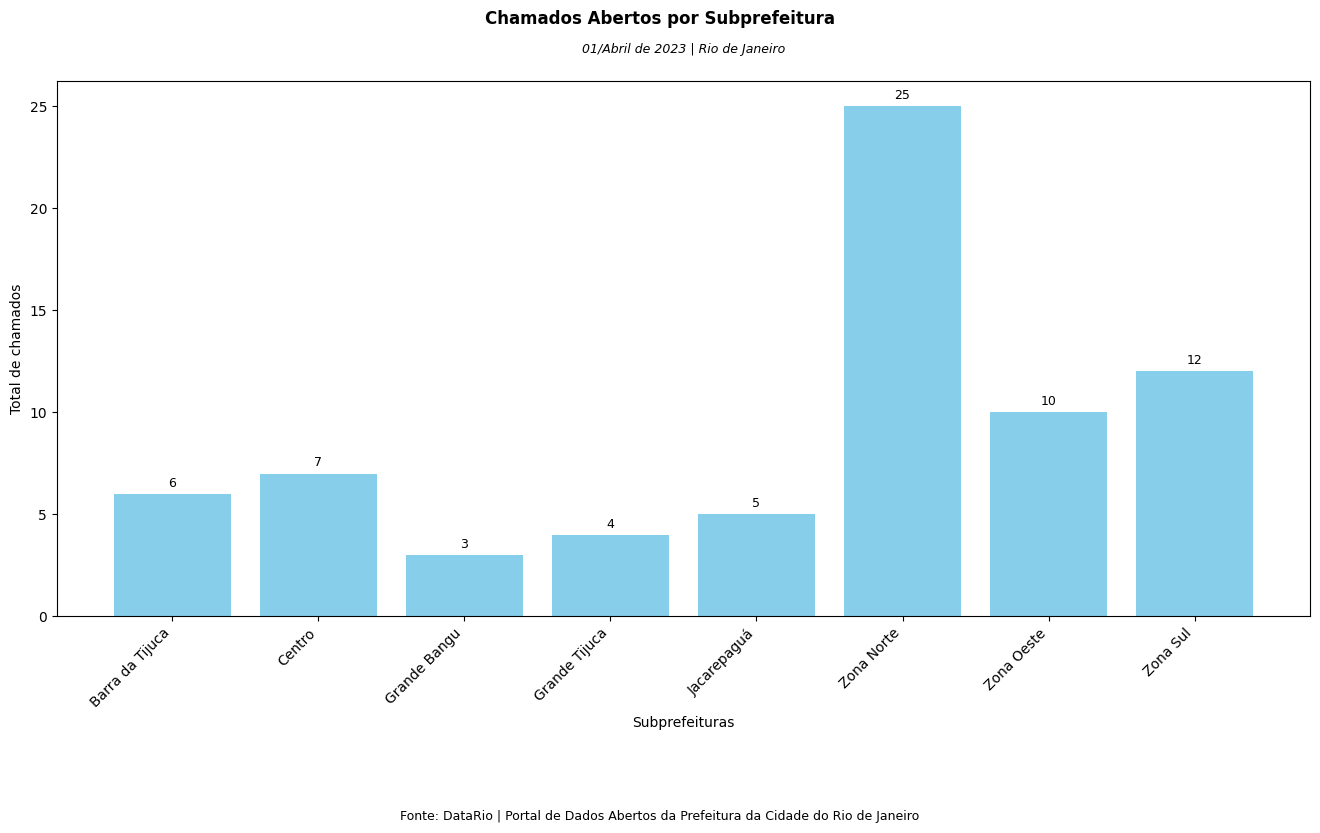

In [10]:
# Gráfico de barras Chamados Abertos por Subprefeitura 01/04/2023

chamados_por_subprefeitura = dados_filtrados.groupby('subprefeitura')['id_chamado'].count()

plt.figure(figsize=(13.3, 7.5))
bars = plt.bar(chamados_por_subprefeitura.index, chamados_por_subprefeitura.values, color='skyblue')

# Adicionando rótulos nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=45, ha='right')
plt.grid(False)

# Título, subtítulo, fonte
plt.xlabel('Subprefeituras')
plt.ylabel('Total de chamados')
plt.suptitle("Chamados Abertos por Subprefeitura", ha='center', fontsize=12, fontweight='bold')
plt.title("01/Abril de 2023 | Rio de Janeiro", ha='center', fontsize=9, style='italic', pad=20)
plt.figtext(0.5, -0.1, 'Fonte: DataRio | Portal de Dados Abertos da Prefeitura da Cidade do Rio de Janeiro', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


RESPOSTA: A subprefeitura com mais chamados foi da Zona Norte com um total de 25 chamados abertos no dia 01/04/2023

#### 5- Existe algum chamado aberto nesse dia que não foi associado a um bairro ou subprefeitura na tabela de bairros? Se sim, por que isso acontece?

In [11]:
# Filtrando os dados para a data de início igual a '01/04/2023' e onde o bairro ou subprefeitura não estão associados
dados_sem_localizacao = dados[(dados['data_inicio'].dt.strftime('%Y-%m-%d') == '2023-04-01') & (dados['nome'].isna() | dados['subprefeitura'].isna())]
dados_sem_localizacao


,id_chamado,data_inicio,data_fim,id_bairro,id_territorialidade,id_logradouro,numero_logradouro,id_unidade_organizacional,nome_unidade_organizacional,id_unidade_organizacional_mae,...,id_area_planejamento,id_regiao_planejamento,nome_regiao_planejamento,id_regiao_administrativa,nome_regiao_administrativa,subprefeitura,area,perimetro,geometry_wkt,geometry_y
1516021,18516246,2023-04-01 00:55:38,2023-04-01 00:55:38,None,None,None,<NA>,1706,TR/SUBOP/CFT - Coordenadoria de Fiscalização e...,SMTR - Secretaria Municipal de Transportes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


RESPOSTA: Sim, podemos observar que há uma discrepância nos números de chamados ao longo da análise. Inicialmente, ao contabilizar o total de chamados para a data específica de 01/04/2023, identificamos 73 registros. No entanto, ao examinar os chamados por bairro e subprefeitura, notamos apenas 72 registros.

Essa diferença sugere a presença de um chamado aberto que não está associado a nenhum bairro ou subprefeitura específicos. Essa falta de associação pode ocorrer devido a várias razões, nesse caso identifica - se dados incompletos ou ausentes no momento do registro, problemas técnicos durante a coleta ou até mesmo erros humanos na inserção dos dados.

#### 6- Quantos chamados com o subtipo "Perturbação do sossego" foram abertos desde 01/01/2022 até 31/12/2023 (incluindo extremidades)?


In [12]:
# Definindo a data de início e a data de término do período
data_inicial = datetime(2022, 1, 1).date()
data_final = datetime(2023, 12, 31).date()

dados['data_inicio'] = pd.to_datetime(dados['data_inicio']).dt.date

# Filtrando os dados para incluir apenas os chamados com o subtipo "Perturbação do sossego" e dentro do período desejado
chamados_periodo = dados[(dados['subtipo'] == 'Perturbação do sossego') &
                         (dados['data_inicio'] >= data_inicial) &
                         (dados['data_inicio'] <= data_final)]

# Contando os chamados únicos na coluna id_chamado
total_chamados_unicos = chamados_periodo['id_chamado'].nunique()
print("Total de chamados únicos com o subtipo 'Perturbação do sossego' abertos de 01/01/2022 a 31/12/2023:", total_chamados_unicos)


Total de chamados únicos com o subtipo 'Perturbação do sossego' abertos de 01/01/2022 a 31/12/2023: 42408


RESPOSTA: O total de chamados aberto denominados como Pertubação de sossego nos em 2022/2023 foram 42408

#### 7- Selecione os chamados com esse subtipo que foram abertos durante os eventos contidos na tabela de eventos (Reveillon, Carnaval e Rock in Rio).


In [13]:
%%capture
# Dados sobre os eventos da cidade do Rio de Janeiro - RJ

dados_evento = bd.read_sql ( "SELECT * FROM `datario.turismo_fluxo_visitantes.rede_hoteleira_ocupacao_eventos`" , billing_project_id = "projeto-rio2024" )
dados_evento

In [14]:
# Unindo os dataframe chamados_periodo e dados_evento
chamados_eventos = chamados_periodo.merge(dados_evento, how='cross')

# Convertendo as datas do evento para o formato datetime
chamados_eventos['data_inicial'] = pd.to_datetime(chamados_eventos['data_inicial'])
chamados_eventos['data_final'] = pd.to_datetime(chamados_eventos['data_final'])

# Filtrando as linhas pelo intervalo de datas desejado
resultado_final = chamados_eventos[(chamados_eventos['data_inicio'] >= chamados_eventos['data_inicial']) &
                                     (chamados_eventos['data_inicio'] <= chamados_eventos['data_final'])]

# Contando os chamados únicos na coluna id_chamado
total_chamados_durante_eventos = resultado_final['id_chamado'].nunique()
print("Total de chamados abertos durante os eventos:", total_chamados_durante_eventos)

Total de chamados abertos durante os eventos: 1212


#### 8- Quantos chamados desse subtipo foram abertos em cada evento?

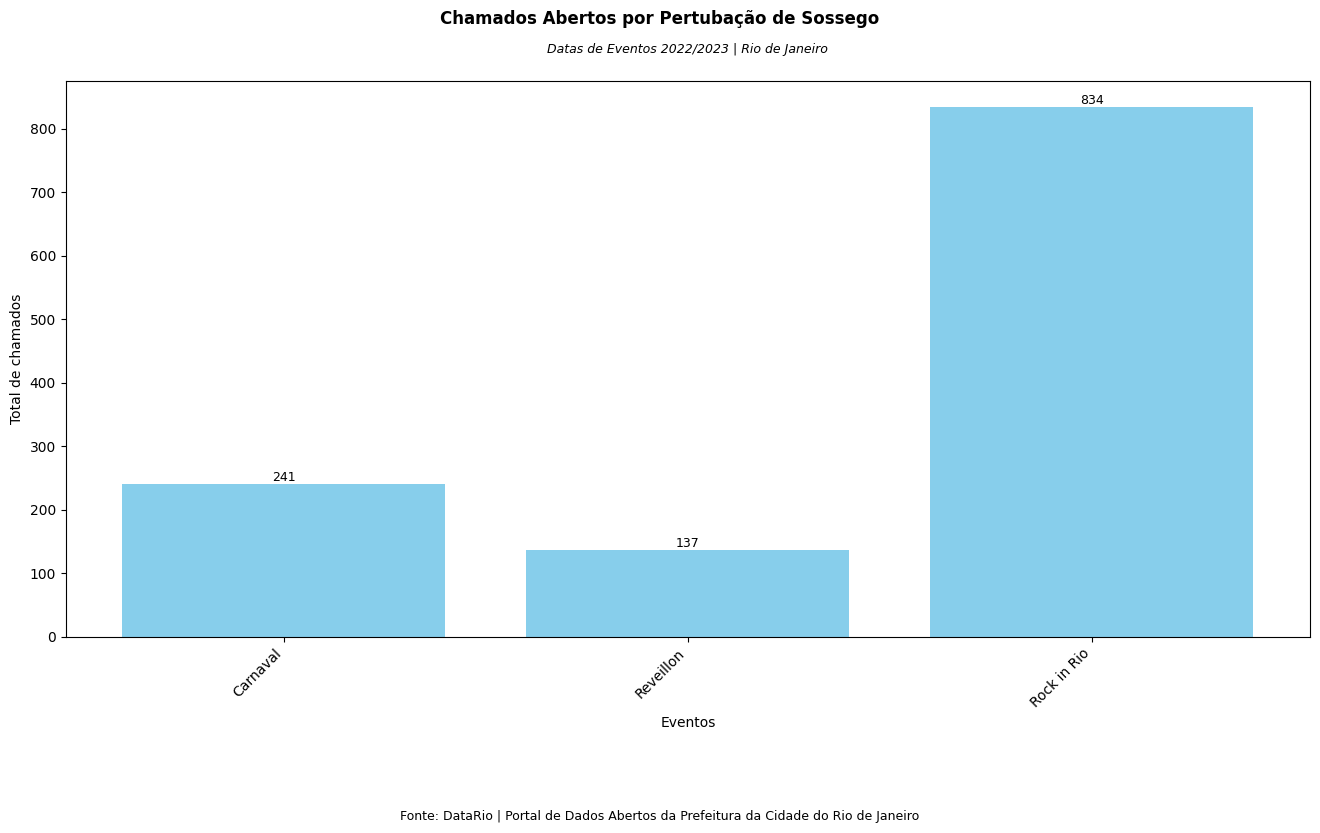

In [15]:
# Gráfico de barras Chamados subtipos por evento

chamados_por_evento = resultado_final.groupby('evento')['id_chamado'].count()

plt.figure(figsize=(13.3, 7.5))
bars = plt.bar(chamados_por_evento.index, chamados_por_evento.values, color='skyblue')

# Adicionando rótulos nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=45, ha='right')
plt.grid(False)

# Título, lengeda, fonte
plt.xlabel('Eventos')
plt.ylabel('Total de chamados')
plt.suptitle("Chamados Abertos por Pertubação de Sossego", ha='center', fontsize=12, fontweight='bold')
plt.title("Datas de Eventos 2022/2023 | Rio de Janeiro", ha='center', fontsize=9, style='italic', pad=20)
plt.figtext(0.5, -0.1, 'Fonte: DataRio | Portal de Dados Abertos da Prefeitura da Cidade do Rio de Janeiro', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


#### 9- Qual evento teve a maior média diária de chamados abertos desse subtipo?


In [18]:
# Tabela Total de Chamados e Média Diária por Evento

# Total de dias de cada evento
dias_reveillon = 3
dias_carnaval = 4
dias_rock_in_rio = 7

# Calculando a média diária de chamados por evento
media_diaria_reveillon = chamados_por_evento['Reveillon'] / dias_reveillon
media_diaria_carnaval = chamados_por_evento['Carnaval'] / dias_carnaval
media_diaria_rock_in_rio = chamados_por_evento['Rock in Rio'] / dias_rock_in_rio

# DataFrame com os dados
dados_tabela3 = pd.DataFrame({
    'Evento': ['Reveillon', 'Carnaval', 'Rock in Rio'],
    'Total de Chamados': [chamados_por_evento['Reveillon'], chamados_por_evento['Carnaval'], chamados_por_evento['Rock in Rio']],
    'Média Diária': [media_diaria_reveillon, media_diaria_carnaval, media_diaria_rock_in_rio]
})

# Ordenando a tabela em ordem decrescente pelo número total de chamados
dados_tabela3 = dados_tabela3.sort_values(by='Total de Chamados', ascending=False)

# Evento com a maior quantidade de chamados
evento_maior_chamados_corrigido = dados_tabela3.iloc[0]['Evento']

# Lista de cores para destacar as linhas
cores_destaque_corrigido = ['lightgreen' if evento == evento_maior_chamados_corrigido else 'white' for evento in dados_tabela3['Evento']]

# Tabela
fig = go.Figure(data=[go.Table(
    header=dict(values=['Evento', 'Total de Chamados', 'Média Diária'],
                fill_color='grey',
                align='center',
                font=dict(color='white', size=14, family='Arial, sans-serif')),
    cells=dict(values=[dados_tabela3['Evento'], dados_tabela3['Total de Chamados'], dados_tabela3['Média Diária']],
               fill_color=[cores_destaque_corrigido, cores_destaque_corrigido, cores_destaque_corrigido],
               align='center',
               font=dict(color='black', size=12, family='Arial, sans-serif')))
])

# Ajustando o layout
fig.update_layout(
    title=dict(text="Total de Chamados e Média Diária por Evento", x=0.5, font=dict(size=16)),
    annotations=[dict(text="Fonte: DataRio | Portal de Dados Abertos da Prefeitura da Cidade do Rio de Janeiro", showarrow=False, x=0.5, y=-0.15, xref='paper', yref='paper', font=dict(size=12))]
)

fig.show()


#### 10- Compare as médias diárias de chamados abertos desse subtipo durante os eventos específicos (Reveillon, Carnaval e Rock in Rio) e a média diária de chamados abertos desse subtipo considerando todo o período de 01/01/2022 até 31/12/2023.

In [20]:
# Tabela Total de Chamados e Média Diária por Evento e Período Completo

# Calcular a média diária de chamados para o período de 01/01/2022 até 31/12/2023
total_dias_periodo = (data_final - data_inicial).days + 1  # Adicionando 1 para incluir o último dia
media_diaria_periodo = total_chamados_unicos / total_dias_periodo

# Adicionando a média diária do período ao DataFrame dados_tabela_corrigida
dados_tabela3 = dados_tabela3.append({'Evento': 'Período Completo', 'Total de Chamados': total_dias_periodo, 'Média Diária': media_diaria_periodo}, ignore_index=True)

# Removendo a coluna de variação
dados_tabela_corrigida = dados_tabela3[['Evento', 'Total de Chamados', 'Média Diária']]

# Tabela
fig = go.Figure(data=[go.Table(
    header=dict(values=['Evento', 'Total de Chamados', 'Média Diária'],
                fill_color='grey',
                align='center',
                font=dict(color='white', size=14, family='Arial, sans-serif')),
    cells=dict(values=[dados_tabela_corrigida['Evento'], dados_tabela_corrigida['Total de Chamados'], dados_tabela_corrigida['Média Diária']],
               fill_color='white',
               align='center',
               font=dict(color='black', size=12, family='Arial, sans-serif')))
])

# Título, legenda
fig.update_layout(
    title=dict(text="Total de Chamados e Média Diária por Evento e Período Completo", x=0.5, font=dict(size=16)),
    annotations=[dict(text="Fonte: DataRio | Portal de Dados Abertos da Prefeitura da Cidade do Rio de Janeiro", showarrow=False, x=0.5, y=-0.15, xref='paper', yref='paper', font=dict(size=12))]
)

fig.show()


### Análise Exploratória

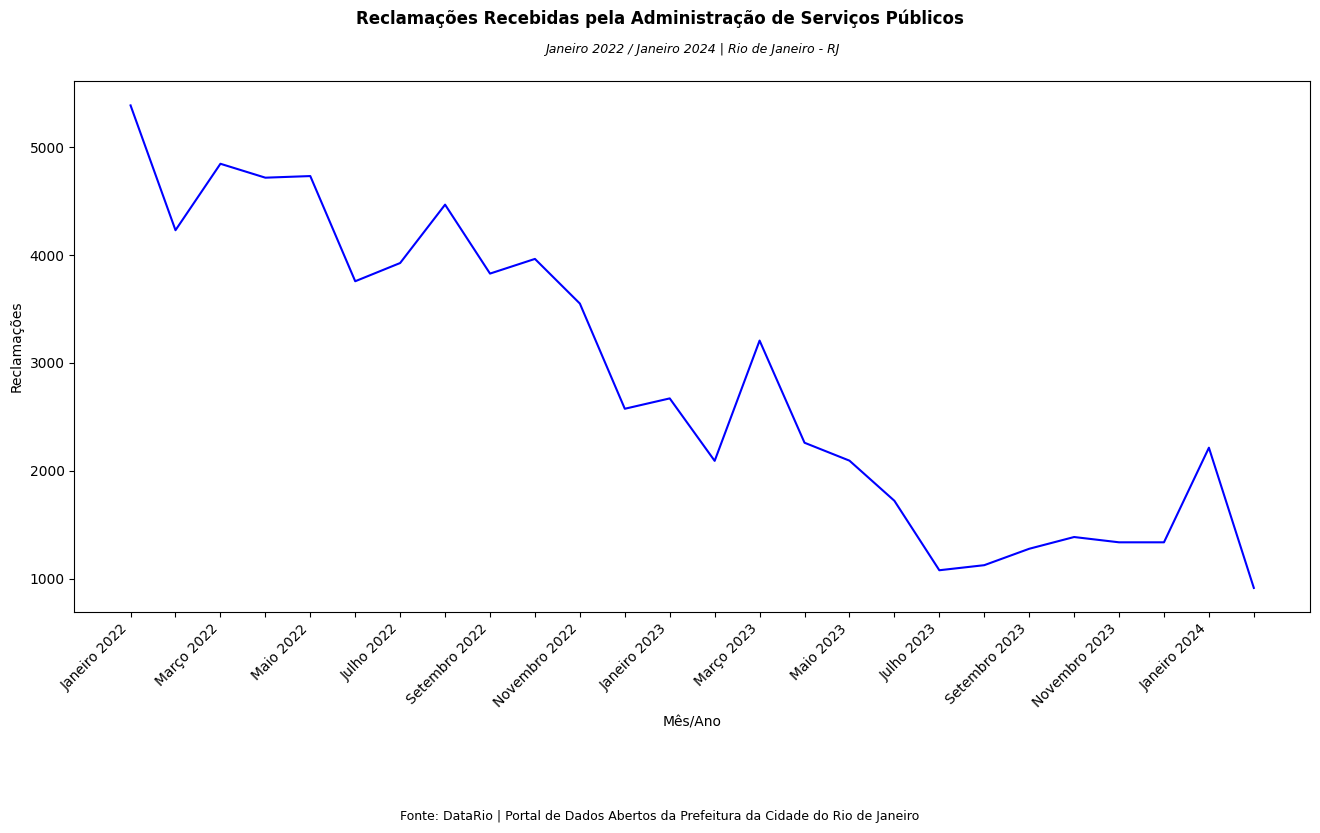

In [21]:
# Mapa de tradução dos nomes dos meses
mapa_meses = {
    'January': 'Janeiro',
    'February': 'Fevereiro',
    'March': 'Março',
    'April': 'Abril',
    'May': 'Maio',
    'June': 'Junho',
    'July': 'Julho',
    'August': 'Agosto',
    'September': 'Setembro',
    'October': 'Outubro',
    'November': 'Novembro',
    'December': 'Dezembro'
}

# Criar uma cópia do DataFrame
dados_copia = dados.copy()

# Converter a coluna de datas para o tipo datetime
dados_copia['data_inicio'] = pd.to_datetime(dados_copia['data_inicio'])

# Definir a coluna de datas como índice do DataFrame
dados_copia.set_index('data_inicio', inplace=True)

# Agrupar as reclamações por mês e calcular a quantidade total de reclamações em cada mês
reclamacoes_por_mes = dados_copia.resample('M')['reclamacoes'].sum()

# Converter o índice do DataFrame para strings com os nomes dos meses em português
reclamacoes_por_mes.index = reclamacoes_por_mes.index.strftime('%B %Y')
reclamacoes_por_mes.index = reclamacoes_por_mes.index.map(lambda x: ' '.join(mapa_meses.get(mes, mes) for mes in x.split()))

# Criar o gráfico de linha
plt.figure(figsize=(13.3, 7.5))

# Plotar a linha
reclamacoes_por_mes.plot(kind='line', color='blue')

# Ajustar os rótulos do eixo x para exibir apenas os nomes dos meses de 2 em 2 meses
ticks = [label if i % 2 == 0 else '' for i, label in enumerate(reclamacoes_por_mes.index)]
plt.xticks(range(len(reclamacoes_por_mes.index)), ticks, rotation=45, ha='right')

# Remover a grade do gráfico
plt.grid(False)

# Título, subtítulo, legenda
plt.suptitle("Reclamações Recebidas pela Administração de Serviços Públicos", ha='center', fontsize=12, fontweight='bold')
plt.title("Janeiro 2022 / Janeiro 2024 | Rio de Janeiro - RJ", ha='center', fontsize=9, style='italic', pad=20)
plt.figtext(0.5, -0.1, 'Fonte: DataRio | Portal de Dados Abertos da Prefeitura da Cidade do Rio de Janeiro', ha='center', fontsize=9)
plt.xlabel('Mês/Ano')
plt.ylabel('Reclamações')
plt.tight_layout()
plt.show()


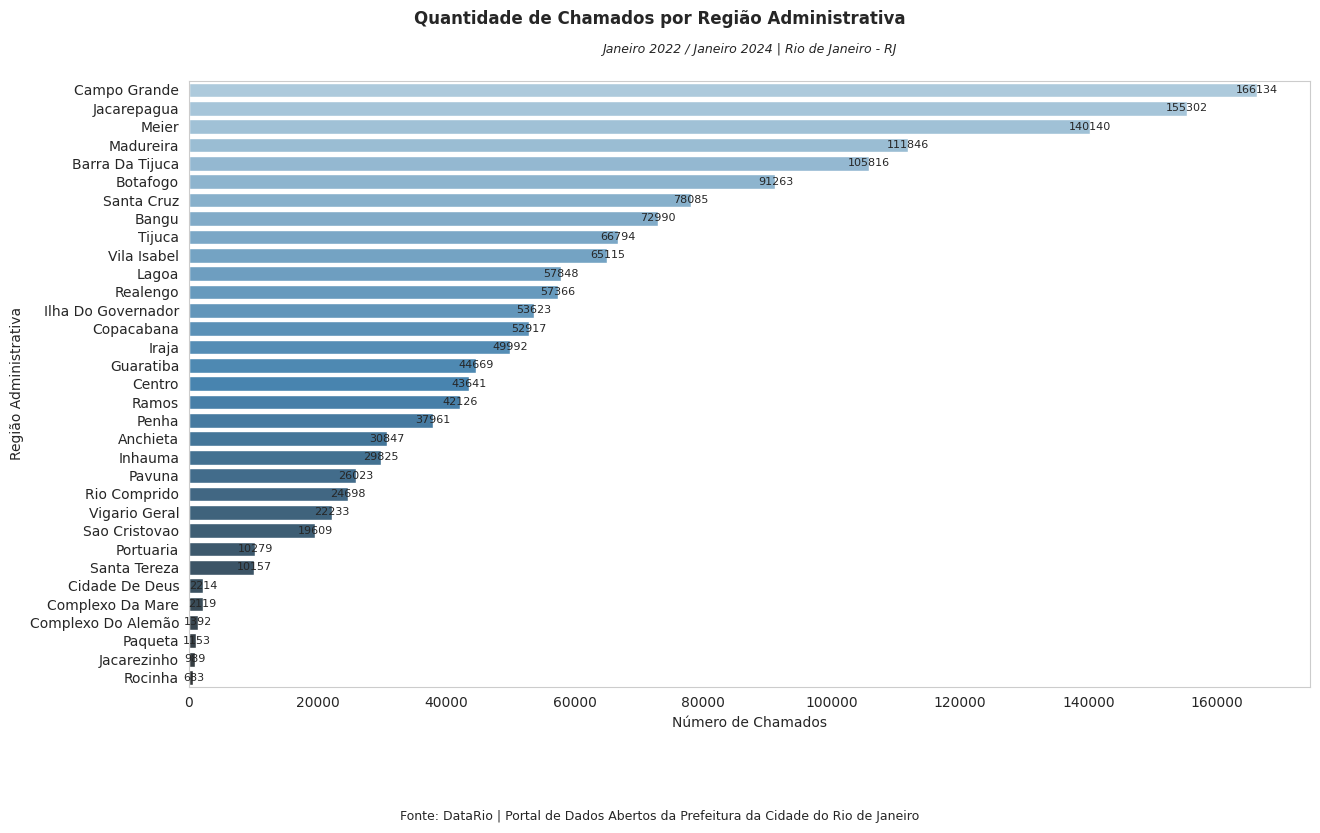

In [23]:
# Gráfico Quantidade de Chamados por Região Administrativa

# Filtrar a coluna 'nome_regiao_administrativa' para remover valores NaN, se houver
dados_filtrados = dados.dropna(subset=['nome_regiao_administrativa'])

# Agrupar os dados pelo nome da região administrativa e contar o número de id_chamado em cada grupo
contagem_por_regiao = dados_filtrados.groupby('nome_regiao_administrativa')['id_chamado'].count().reset_index()

# Ordenar os dados pela contagem de id_chamado em ordem decrescente
contagem_por_regiao = contagem_por_regiao.sort_values(by='id_chamado', ascending=False)

# Criar o gráfico de barras
sns.set_style("whitegrid")
plt.figure(figsize=(13.3, 7.5))
ax = sns.barplot(x='id_chamado', y='nome_regiao_administrativa', data=contagem_por_regiao, palette="Blues_d")

# Adicionar rótulos às barras
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 10, p.get_y() + p.get_height() / 2, f"{int(width)}", ha='center', va='center', fontsize=8)

# Remover a grade do gráfico
plt.grid(False)

# Título, subtítulo, legenda
plt.suptitle("Quantidade de Chamados por Região Administrativa", ha='center', fontsize=12, fontweight='bold')
plt.title("Janeiro 2022 / Janeiro 2024 | Rio de Janeiro - RJ", ha='center', fontsize=9, style='italic', pad=20)
plt.figtext(0.5, -0.1, 'Fonte: DataRio | Portal de Dados Abertos da Prefeitura da Cidade do Rio de Janeiro', ha='center', fontsize=9)
plt.xlabel('Número de Chamados')
plt.ylabel('Região Administrativa')
plt.tight_layout()
plt.show()


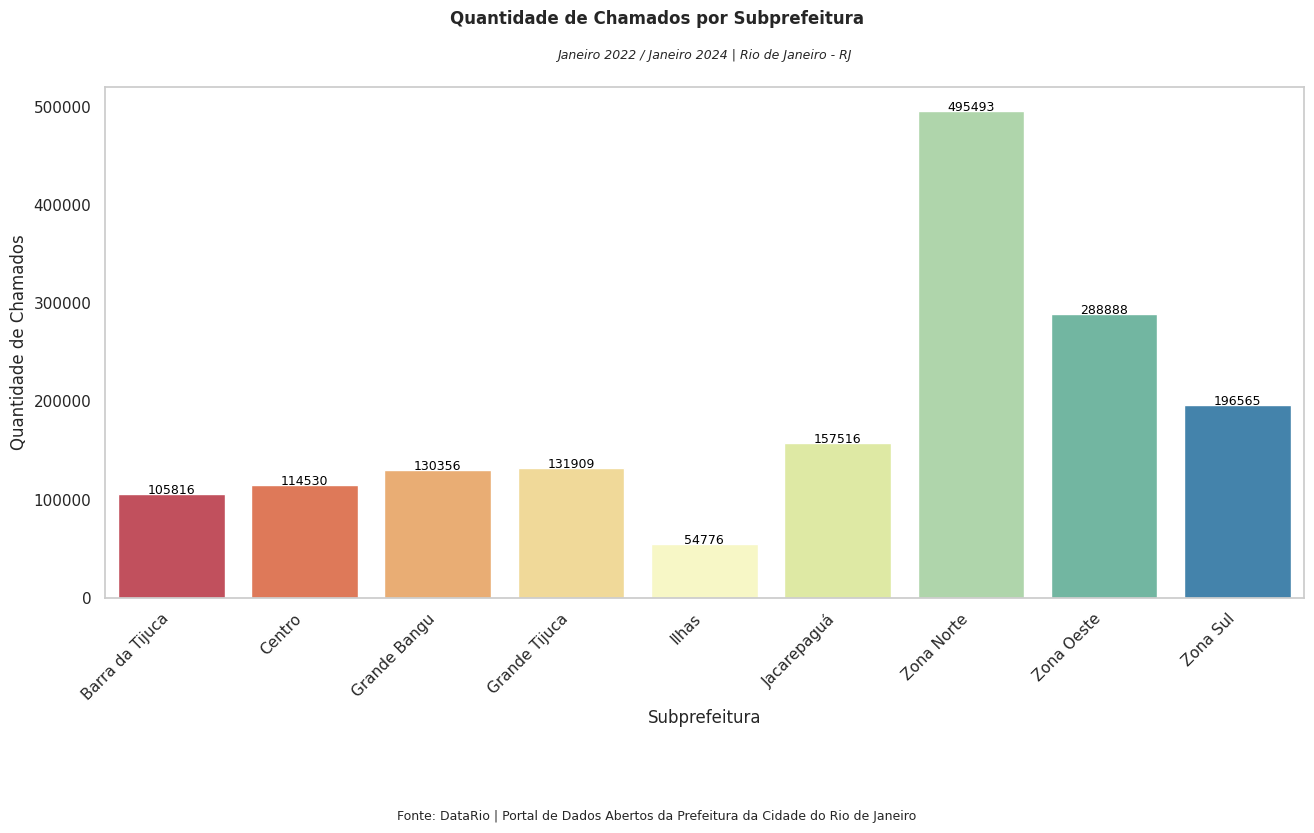

In [26]:
# Gráfico Quantidade de Chamados por Subprefeitura

# Filtrar os dados para remover valores NaN na coluna 'subprefeitura'
dados_filtrados = dados.dropna(subset=['subprefeitura'])

# Agrupar os dados por subprefeitura e contar os valores únicos de id_chamado
dados_agrupados = dados_filtrados.groupby('subprefeitura')['id_chamado'].nunique().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(13.3, 7.5))
sns.set(style="whitegrid")

ax = sns.barplot(x="subprefeitura",
                 y="id_chamado",
                 data=dados_agrupados,
                 palette="Spectral")  # Alteração da paleta de cores para Spectral

# Definir os rótulos para o eixo x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adicionar rótulos nas barras
for index, row in dados_agrupados.iterrows():
    ax.text(index, row['id_chamado'], str(row['id_chamado']), color='black', ha="center", fontsize=9)

# Remover a grade do gráfico
plt.grid(False)

# Título, legenda e fonte
plt.suptitle("Quantidade de Chamados por Subprefeitura", fontsize=12, fontweight='bold')
plt.title("Janeiro 2022 / Janeiro 2024 | Rio de Janeiro - RJ", ha='center', fontsize=9, style='italic', pad=20)
plt.xlabel("Subprefeitura")
plt.ylabel("Quantidade de Chamados")
plt.figtext(0.5, -0.1, "Fonte: DataRio | Portal de Dados Abertos da Prefeitura da Cidade do Rio de Janeiro", wrap=True, horizontalalignment='center', fontsize=9)

plt.tight_layout()
plt.show()
